In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
myDF=pd.read_excel('CreditCardCustomerData.xlsx')
myDF.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [3]:
myDF.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [4]:
myDF.shape

(660, 7)

In [5]:
myDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [6]:
myDF.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

#### The total number of Customer Keys is not equal to the Sl No. We need to investigate this. 

### Checking for Duplicate Customer Keys

In [7]:
##df[df.duplicated(['Customer Key'], keep=False)]
myDF[myDF.duplicated(['Customer Key'],keep=False)].sort_values(by='Customer Key', ascending=False)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


#### Dropping Duplicate Rows since we have no information if the duplicates are actually valid (household accounts with multiple card holders) or errors. Plus the duplicates are outliers. 

In [8]:
myDF.drop_duplicates(subset=['Customer Key'], keep=False, inplace=True)
#myDF.drop(myDF[myDF.duplicated(['Customer Key'],keep=False)],inplace=True)
print(myDF.shape)

myDF.nunique()

(650, 7)


Sl_No                  650
Customer Key           650
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [9]:
#The Serial number and Customer key are not needed for this analysis
myDF=myDF.iloc[:,2:]
myDF.head(10)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7
10,10000,4,0,5,5


In [10]:
myDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,650.0,34229.230769,37260.934830,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,650.0,4.696923,2.173979,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,650.0,2.403077,1.627193,0.0,1.0,2.0,4.0,5.0
Total_visits_online,650.0,2.601538,2.924789,0.0,1.0,2.0,4.0,15.0
Total_calls_made,650.0,3.593846,2.857902,0.0,1.0,3.0,5.0,10.0


In [11]:
myDF.skew()

Avg_Credit_Limit       2.215766
Total_Credit_Cards     0.155237
Total_visits_bank      0.138293
Total_visits_online    2.236406
Total_calls_made       0.650247
dtype: float64

In [12]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(myDF)

,Total,Percent
Total_calls_made,0,0.0
Total_visits_online,0,0.0
Total_visits_bank,0,0.0
Total_Credit_Cards,0,0.0
Avg_Credit_Limit,0,0.0


In [13]:
myDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     650 non-null    int64
 1   Total_Credit_Cards   650 non-null    int64
 2   Total_visits_bank    650 non-null    int64
 3   Total_visits_online  650 non-null    int64
 4   Total_calls_made     650 non-null    int64
dtypes: int64(5)
memory usage: 30.5 KB


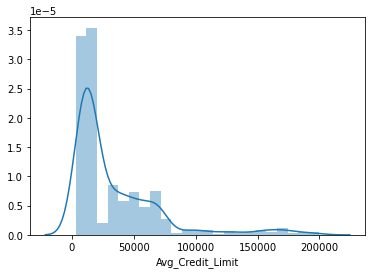

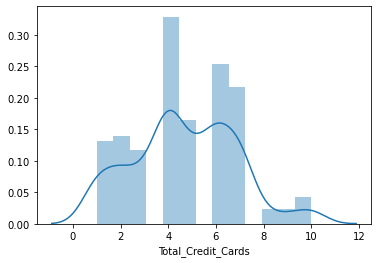

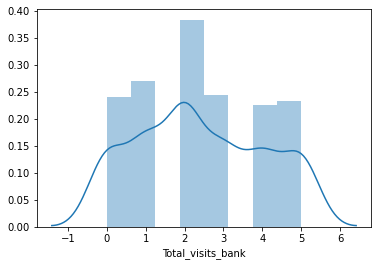

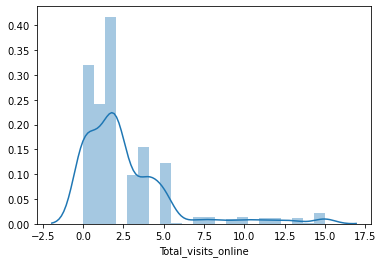

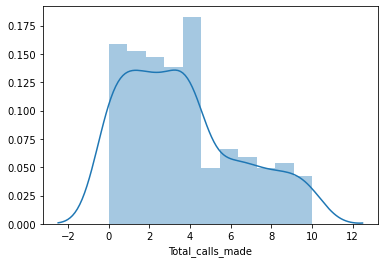

In [14]:
for i in myDF.columns:
    if myDF[i].dtype =='int64':
        sns.distplot(myDF[i])
        plt.show()

#### Creating a function to create a boxplot, print Q1,Q3, IQR, Lower Whisker & Upper Whisker 
The function then returns the Lower Whisker and Upper Whisker. I will call it for every column along with the displot to review and identify outliers

In [15]:
#Lower_Whisker=0
#Upper_Whisker=0
def getboxplot (dfeval, mucol):
    sns.boxplot(data=dfeval,x=dfeval[mucol]);
    plt.show()
    Q1=dfeval[mucol].quantile(0.25)
    Q3=dfeval[mucol].quantile(0.75)
    IQR=Q3-Q1
    print('Q1: ', Q1)
    print('Q3: ',Q3)
    print('IQR: ',IQR)
  #  global Lower_Whisker
 #    global Upper_Whisker
    Lower_Whisker = Q1-(1.5 * IQR)
    Upper_Whisker = Q3 + (1.5*IQR)
    print ('Lower Whisker Value: {:.2f} \nUpper Whisker Value: {:.2f}'.format(Lower_Whisker,Upper_Whisker))
    
    return Lower_Whisker, Upper_Whisker;



In [16]:
myDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,650.0,34229.230769,37260.934830,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,650.0,4.696923,2.173979,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,650.0,2.403077,1.627193,0.0,1.0,2.0,4.0,5.0
Total_visits_online,650.0,2.601538,2.924789,0.0,1.0,2.0,4.0,15.0
Total_calls_made,650.0,3.593846,2.857902,0.0,1.0,3.0,5.0,10.0


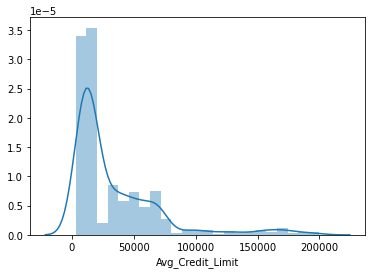

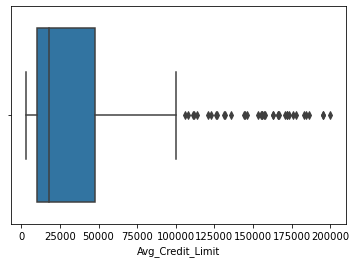

Q1:  10000.0
Q3:  48000.0
IQR:  38000.0
Lower Whisker Value: -47000.00 
Upper Whisker Value: 105000.00


Number of outliers:
38





,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
615,131000,9,1,10,1
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0
620,108000,10,0,15,1
621,166000,9,1,12,2
622,176000,10,1,15,2
623,166000,10,0,7,0


In [17]:
sns.distplot(myDF['Avg_Credit_Limit'])
plt.show()
Lower_Whisker_avgcreditlimit,Upper_Whisker_avgcreditlimit= getboxplot(myDF,'Avg_Credit_Limit' )

print('\n\nNumber of outliers:')
print(myDF.loc[(myDF['Avg_Credit_Limit']>Upper_Whisker_avgcreditlimit) | (myDF['Avg_Credit_Limit']<Lower_Whisker_avgcreditlimit) ].shape[0])
print('\n\n')
myDF.loc[(myDF['Avg_Credit_Limit']>Upper_Whisker_avgcreditlimit) | (myDF['Avg_Credit_Limit']<Lower_Whisker_avgcreditlimit) ]

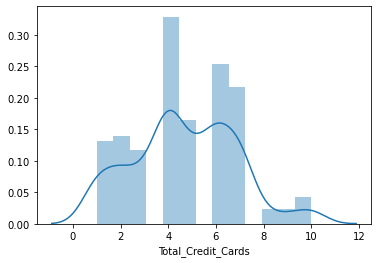

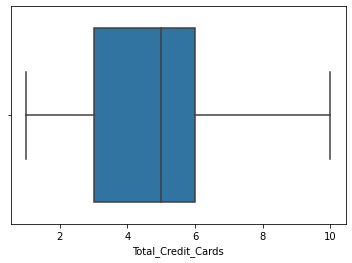

Q1:  3.0
Q3:  6.0
IQR:  3.0
Lower Whisker Value: -1.50 
Upper Whisker Value: 10.50


Number of outliers:
0





,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [18]:
sns.distplot(myDF['Total_Credit_Cards'])
plt.show()
Lower_Whisker_total_cc,Upper_Whisker_total_cc= getboxplot(myDF,'Total_Credit_Cards' )

print('\n\nNumber of outliers:')
print(myDF.loc[(myDF['Total_Credit_Cards']>Upper_Whisker_total_cc) | (myDF['Total_Credit_Cards']<Lower_Whisker_total_cc) ].shape[0])
print('\n\n')
myDF.loc[(myDF['Total_Credit_Cards']>Upper_Whisker_total_cc) | (myDF['Total_Credit_Cards']<Lower_Whisker_total_cc) ]

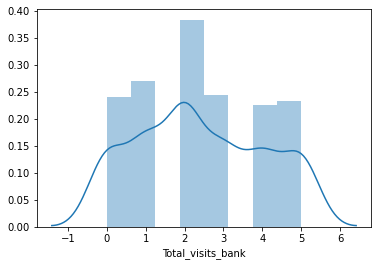

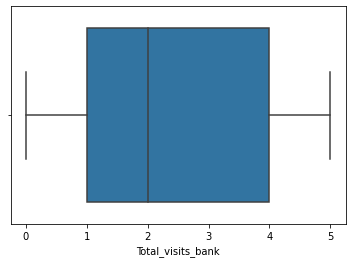

Q1:  1.0
Q3:  4.0
IQR:  3.0
Lower Whisker Value: -3.50 
Upper Whisker Value: 8.50


Number of outliers:
0





,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [19]:
sns.distplot(myDF['Total_visits_bank'])
plt.show()
Lower_Whisker_totalbankvisit,Upper_Whisker_totalbankvisit= getboxplot(myDF,'Total_visits_bank' )

print('\n\nNumber of outliers:')
print(myDF.loc[(myDF['Total_visits_bank']>Upper_Whisker_totalbankvisit) | (myDF['Total_visits_bank']<Lower_Whisker_totalbankvisit) ].shape[0])
print('\n\n')
myDF.loc[(myDF['Total_visits_bank']>Upper_Whisker_totalbankvisit) | (myDF['Total_visits_bank']<Lower_Whisker_totalbankvisit) ]

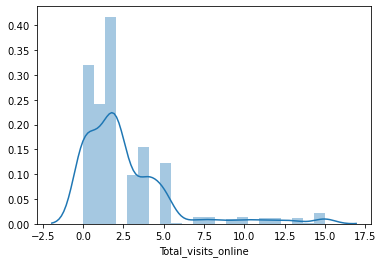

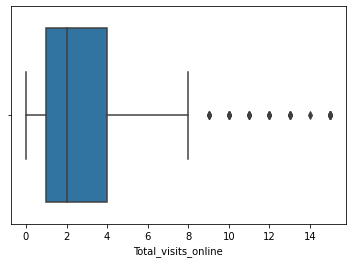

Q1:  1.0
Q3:  4.0
IQR:  3.0
Lower Whisker Value: -3.50 
Upper Whisker Value: 8.50


Number of outliers:
36





,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0
615,131000,9,1,10,1
616,96000,10,1,11,2
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0
620,108000,10,0,15,1


In [20]:
sns.distplot(myDF['Total_visits_online'])
plt.show()
Lower_Whisker_visitsonline,Upper_Whisker_visitsonline= getboxplot(myDF,'Total_visits_online' )

print('\n\nNumber of outliers:')
print(myDF.loc[(myDF['Total_visits_online']>Upper_Whisker_visitsonline) | (myDF['Total_visits_online']<Lower_Whisker_visitsonline) ].shape[0])
print('\n\n')
myDF.loc[(myDF['Total_visits_online']>Upper_Whisker_visitsonline) | (myDF['Total_visits_online']<Lower_Whisker_visitsonline) ]

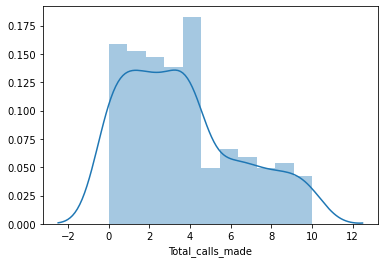

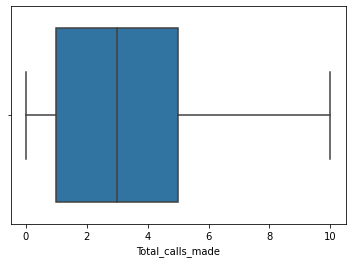

Q1:  1.0
Q3:  5.0
IQR:  4.0
Lower Whisker Value: -5.00 
Upper Whisker Value: 11.00


Number of outliers:
0





,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [21]:
sns.distplot(myDF['Total_calls_made'])
plt.show()
Lower_Whisker_totalcallsmade,Upper_Whisker_totalcallsmade= getboxplot(myDF,'Total_calls_made' )

print('\n\nNumber of outliers:')
print(myDF.loc[(myDF['Total_calls_made']>Upper_Whisker_totalcallsmade) | (myDF['Total_calls_made']<Lower_Whisker_totalcallsmade) ].shape[0])
print('\n\n')
myDF.loc[(myDF['Total_calls_made']>Upper_Whisker_totalcallsmade) | (myDF['Total_calls_made']<Lower_Whisker_totalcallsmade) ]

#### From the above EDA, we can see have outliers for the following:
1. Average Credit Limit 
2. Total Visits Online

We need to account for these outliers by replacing with the median 
I was tempted to replace the values with the median but the values seem to be indicative of real customer behavior. There are always customers who go online a lot plus customers with really high credit limits. Hence I will not be replacing. The below codes are commented.  

In [22]:
#Outlier adjustment for Average Credit Limit
#myDF['Avg_Credit_Limit'] = np.where((myDF['Avg_Credit_Limit']>Upper_Whisker_avgcreditlimit) | (myDF['Avg_Credit_Limit']<Lower_Whisker_avgcreditlimit), myDF['Avg_Credit_Limit'].median(), myDF['Avg_Credit_Limit'])
#myDF.loc[(myDF['Avg_Credit_Limit']>Upper_Whisker_avgcreditlimit) | (myDF['Avg_Credit_Limit']<Lower_Whisker_avgcreditlimit) ]

#Outlier adjustment for Total visits online
#myDF['Total_visits_online'] = np.where((myDF['Total_visits_online']>Upper_Whisker_visitsonline) | (myDF['Total_visits_online']<Lower_Whisker_visitsonline), myDF['Total_visits_online'].median(), myDF['Total_visits_online'])
#Rechecking for  outliers
#myDF.loc[(myDF['Total_visits_online']>Upper_Whisker_visitsonline) | (myDF['Total_visits_online']<Lower_Whisker_visitsonline) ]


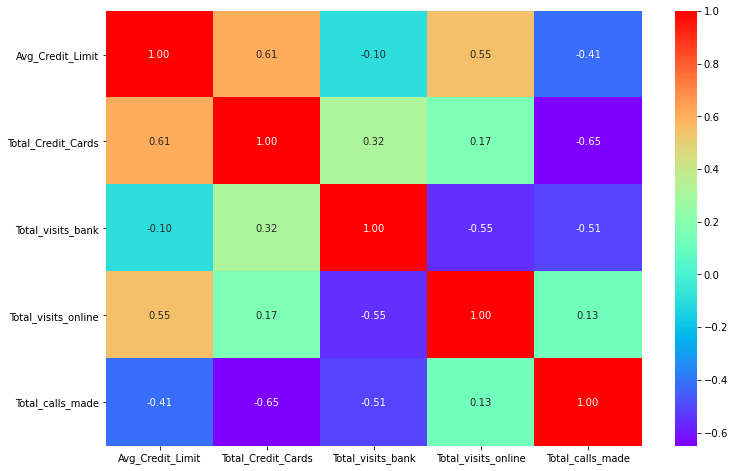

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(myDF.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

#### Decent positive correlation between high credit limit and online visits. 
#### Negative correlation between online visits and and visiting the bank. 

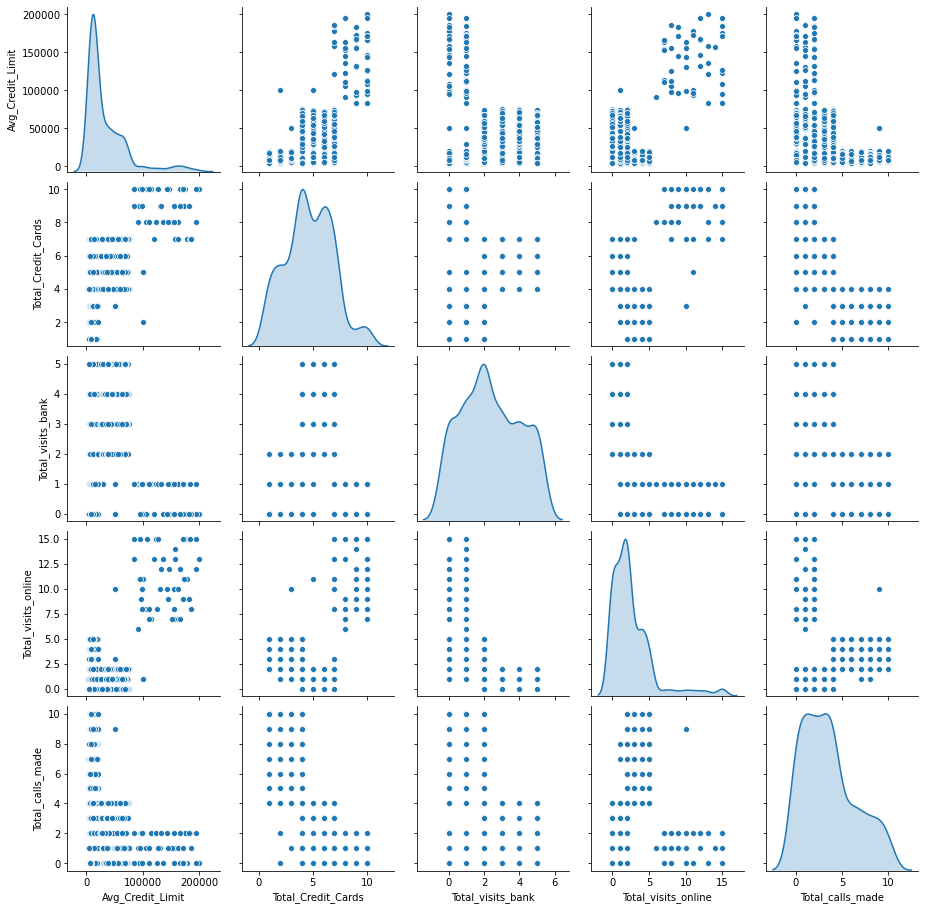

In [24]:
sns.pairplot(myDF, palette="husl",diag_kind='kde');

In [25]:
myDF.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
5,20000,3,0,1,8


In [26]:
#Making a copy to use for Hierchichal Clustering later
myDF_Original=myDF.copy()

## K Means

In [27]:
myDF_zscaled = myDF.apply(zscore)
myDF_zscaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.766499,-1.241502,-0.862932,-0.547996,-1.258480
1,0.423578,-0.781162,-1.477961,2.531519,1.893108
2,0.423578,1.060199,-0.862932,0.136341,0.142226
3,-0.113590,0.139519,-0.862932,-0.547996,0.142226
5,-0.382175,-0.781162,-1.477961,-0.547996,1.542931
6,1.766499,0.139519,-1.477961,2.873688,-0.558127
7,-0.516467,-0.781162,-1.477961,-0.547996,-0.908304
8,-0.785051,-1.241502,-1.477961,-0.205827,-0.558127
9,-0.838768,-0.320822,-1.477961,-0.547996,1.192755
10,-0.650759,-0.320822,-1.477961,0.820678,0.492402


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

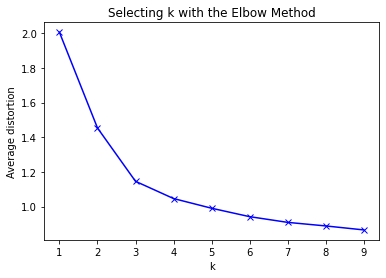

In [28]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(myDF_zscaled)
    prediction=model.predict(myDF_zscaled)
    meanDistortions.append(sum(np.min(cdist(myDF_zscaled, model.cluster_centers_, 'euclidean'), axis=1)) / myDF_zscaled
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [29]:
#Set the value of k=3 based on the above 
kmeans = KMeans(n_clusters=3)

In [30]:
kmeans.fit(myDF_zscaled)

KMeans(n_clusters=3)

In [31]:
prediction=kmeans.predict(myDF_zscaled)

In [32]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.01605199,  0.37574577,  0.6665466 , -0.55429887, -0.55444137],
       [-0.59220283, -1.05487791, -0.90171805,  0.33054458,  1.14070172],
       [ 2.86601632,  1.9041563 , -1.10638129,  2.85943069, -0.8864179 ]])

In [33]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(myDF_zscaled) )
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.016052            0.375746           0.666547   
1         -0.592203           -1.054878          -0.901718   
2          2.866016            1.904156          -1.106381   

   Total_visits_online  Total_calls_made  
0            -0.554299         -0.554441  
1             0.330545          1.140702  
2             2.859431         -0.886418  


### Calculating the Silhouette Scope

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(myDF_zscaled, kmeans.labels_, metric='euclidean')

0.5153584616976485

In [35]:
myDF['GROUP']=prediction
myDF_zscaled['GROUP']=prediction


In [36]:
myDF.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
5,20000,3,0,1,8,1
6,100000,5,0,11,2,2
7,15000,3,0,1,1,1
8,5000,2,0,2,2,1
9,3000,4,0,1,7,1
10,10000,4,0,5,5,1


In [37]:
myDF.tail(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
650,195000,10,1,12,2,2
651,132000,9,1,12,2,2
652,156000,8,1,8,0,2
653,95000,10,0,15,1,2
654,172000,10,1,9,1,2
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2
659,167000,9,0,12,2,2


In [38]:
myDF['GROUP'].value_counts()  

0    380
1    222
2     48
Name: GROUP, dtype: int64

In [39]:
myDFKMeansAnalysis = myDF.groupby(['GROUP'])
myDFKMeansAnalysis.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33631.578947,5.513158,3.486842,0.981579,2.010526
1,12180.180180,2.405405,0.936937,3.567568,6.851351
2,140937.500000,8.833333,0.604167,10.958333,1.062500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029433E80160>,
      dtype=object)

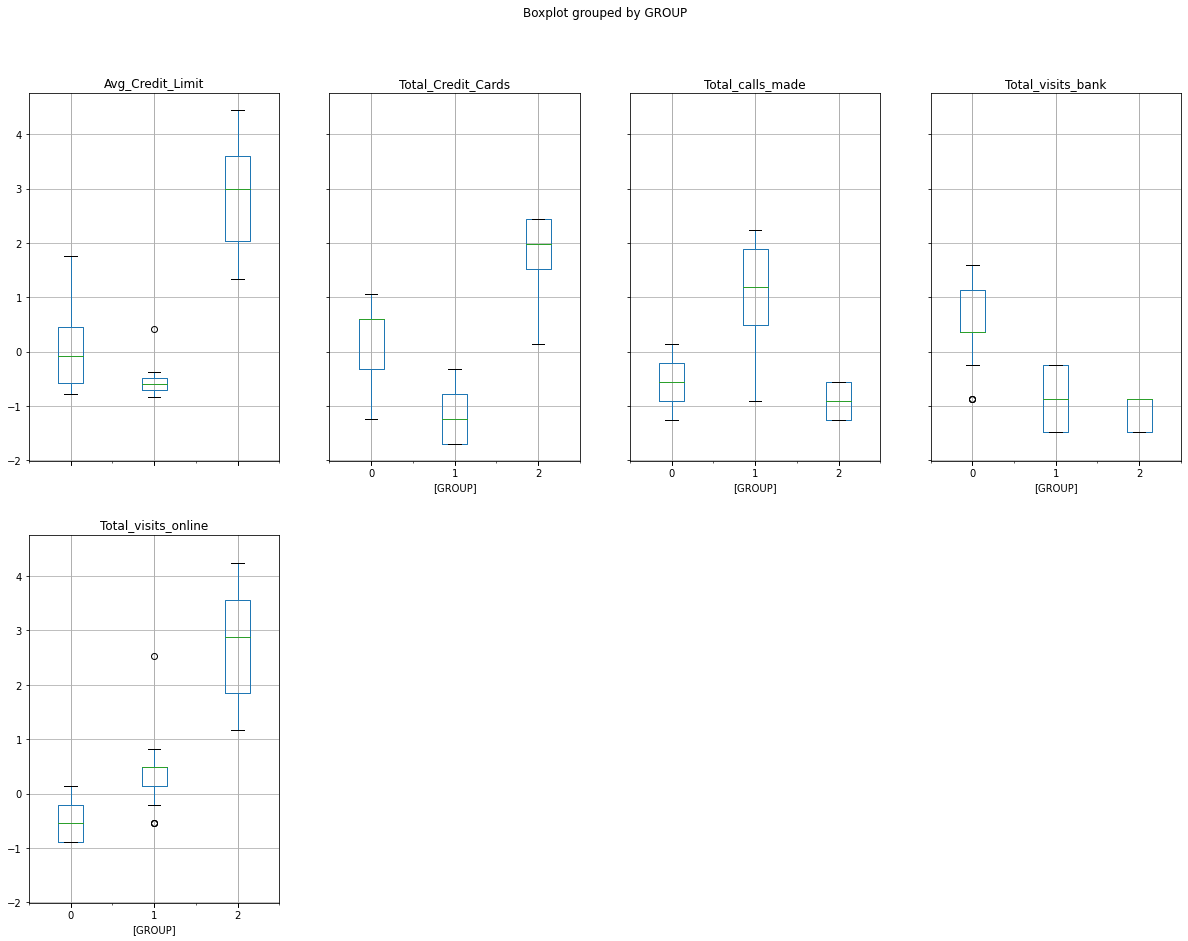

In [40]:
myDF_zscaled.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

### Hierarchial Clustering

In [41]:
myDF_Original.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
5,20000,3,0,1,8


In [42]:
myDFH_zscaled = myDF_Original.apply(zscore)
myDFH_zscaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.766499,-1.241502,-0.862932,-0.547996,-1.258480
1,0.423578,-0.781162,-1.477961,2.531519,1.893108
2,0.423578,1.060199,-0.862932,0.136341,0.142226
3,-0.113590,0.139519,-0.862932,-0.547996,0.142226
5,-0.382175,-0.781162,-1.477961,-0.547996,1.542931
6,1.766499,0.139519,-1.477961,2.873688,-0.558127
7,-0.516467,-0.781162,-1.477961,-0.547996,-0.908304
8,-0.785051,-1.241502,-1.477961,-0.205827,-0.558127
9,-0.838768,-0.320822,-1.477961,-0.547996,1.192755
10,-0.650759,-0.320822,-1.477961,0.820678,0.492402


### Determining the right number of clusters using the various Silhouette values over a few linkage methods

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
silhouette_list = []
for cluster in range(2,10):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(myDFH_zscaled)
        sil_score = metrics.silhouette_score(myDFH_zscaled, agglomerative, metric='euclidean')
        silhouette_list.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
myDF_Compare = pd.DataFrame(silhouette_list, columns=['Number of Clusters', 'Silhouette Score','Linkage', 'number_of_clusters'])

In [45]:
myDF_Compare.sort_values('Silhouette Score', ascending=False)

,Number of Clusters,Silhouette Score,Linkage,number_of_clusters
2,2,0.573612,complete,2
1,2,0.573612,average,2
4,3,0.515560,average,3
3,3,0.514399,ward,3
5,3,0.502053,complete,3
7,4,0.475332,average,4
10,5,0.441233,average,5
0,2,0.418568,ward,2
16,7,0.418036,average,7
13,6,0.416228,average,6


### Based on this best combination would be Clusters =2 and linkage =Complete. Though linkage =average also has a close value

In [46]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='complete')
model.fit(myDFH_zscaled)


AgglomerativeClustering(linkage='complete')

In [47]:
#Revalidating the Silhouette Score
silhouette_score(myDFH_zscaled, model.labels_)

0.5736120946275659

In [48]:
myDF_Original['GROUP'] = model.labels_
myDFH_zscaled['GROUP'] = model.labels_
myDF_Original.head(10)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0
10,10000,4,0,5,5,0


In [49]:
myDF_Original.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1
659,167000,9,0,12,2,1


In [50]:
myDF_Original.groupby(["GROUP"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,602,602,602,602,602
1,48,48,48,48,48


In [51]:
myDFClust = myDF_Original.groupby(['GROUP'])
myDFClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,25720.930233,4.367110,2.546512,1.935216,3.795681
1,140937.500000,8.833333,0.604167,10.958333,1.062500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000294373ADAC0>,
      dtype=object)

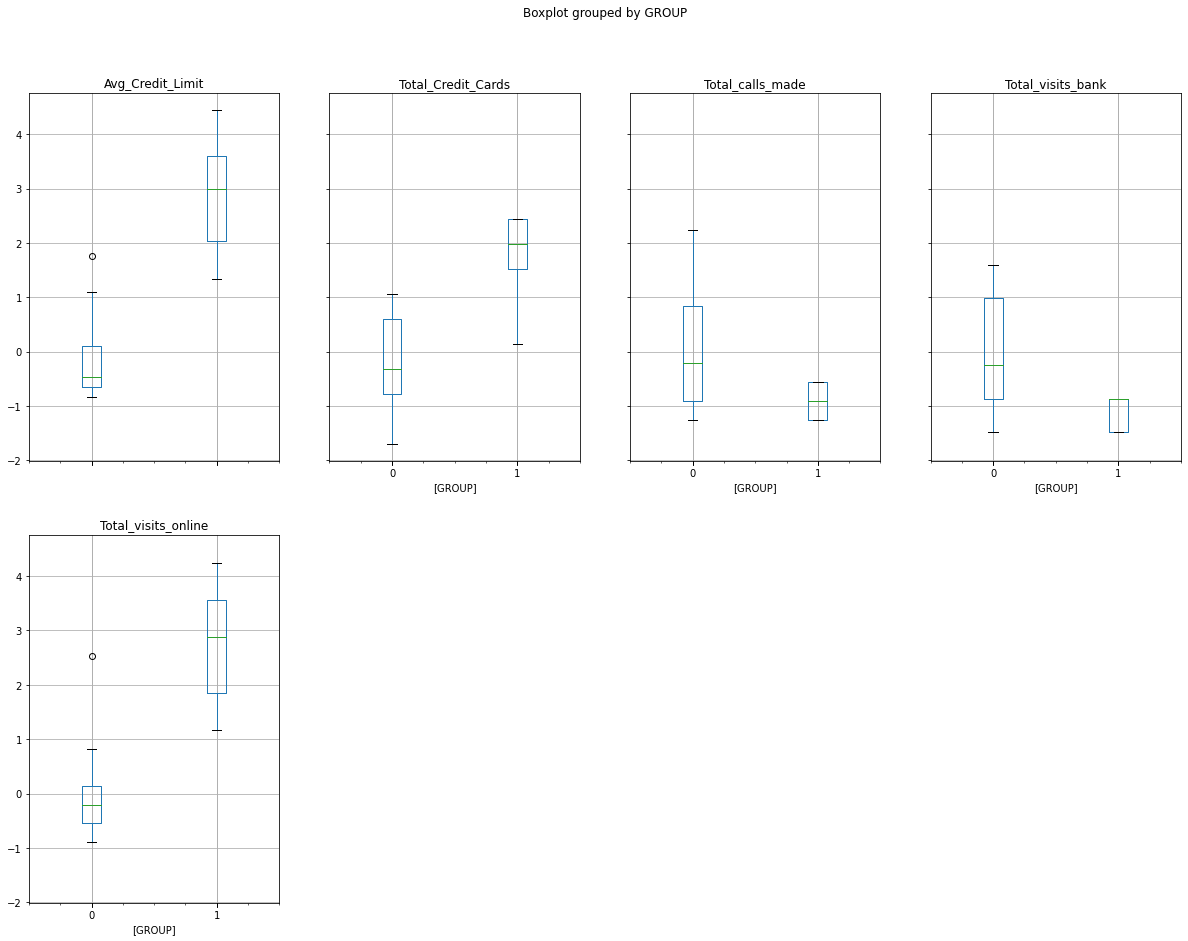

In [52]:
myDFH_zscaled.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [53]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(myDFH_zscaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(myDFH_zscaled))

c

0.8790615702467126

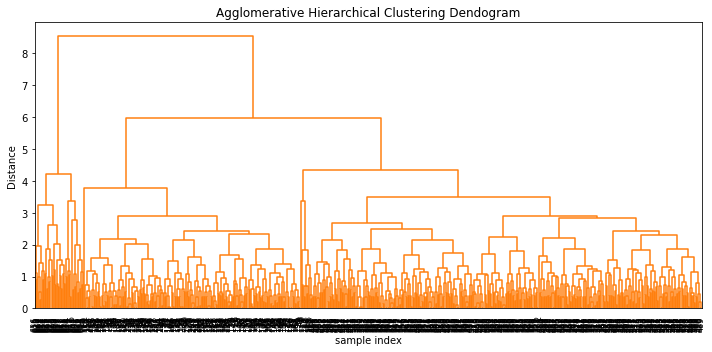

In [54]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

####  We need to truncate this dendogram 

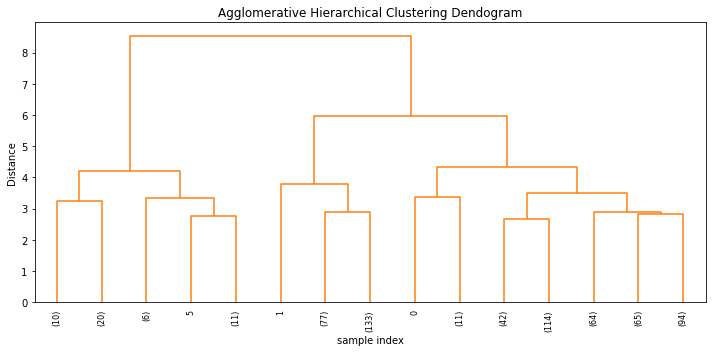

In [55]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp',p=15, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [56]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(myDFH_zscaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(myDFH_zscaled))

c

0.9019093920113892

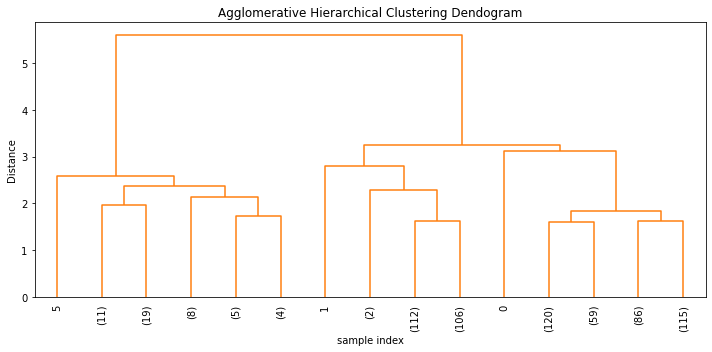

In [57]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp',p=15, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [58]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(myDFH_zscaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(myDFH_zscaled))

c

0.7388225934484453

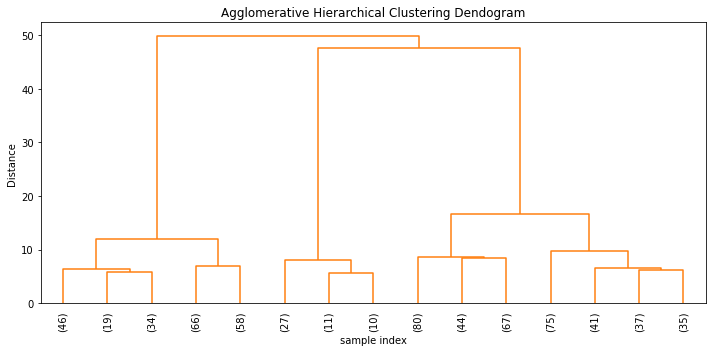

In [59]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp',p=15, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

### Overall Analysis 

With KMeans the elbow method indicated that ideal number of clusters will be 3. 
It segmented the Group 0 and Group 1 as groups which have relatively low number of online visits but definitely call and visit the bank. Group 2 had clients who have high average credit limits , higher number of cards and try to mainly connect with the bank online instead of visiting the bank or calling. 
However between group 0 and group 1, Group 0 had more cards on average and preferred visiting the bank. Group 1 had lower limits and less number of cards and tended to use the online services and call instead of visiting. 

This might indicate that between Group 1 and Group 0, group 1 might be younger clientele with lower credit limits and who are more tech savvy. 

With Hierchical, the Silhoutte score tended to cluster into 2 (group 0 and group 1)and primarily into a cluster with higher credit limit folks who prefer online contact as opposed to call/visit. However, since 92% of the customers were in group 0. It was not very useful. 


Overall based mainly on the KMeans, we can see there are clearly 3 segments. 
1. Clients with high credit limits and who overwhelmingly prefer online contact as opposed to call/visit. This group is a smaller subset. 
2. Clients who have relatively average credit limits and prefer visiting over online/call. 
3. Clients (possibly younger and tech savvy) who are prefer online contact more and calling to an extent but extremely low visits. 

The company can target the three segments in various but appropriate marketing campaigns. The digital savvy younger client could possibly be long term clients and will be enticed with digital features and push marketing. 
The company can also research why their medium tier clients who visit the banks are not using the digital services more. This could help in making the digital services better and save costs on locations and call centers. 





